In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#read csv data fo sample tweets given
df = pd.read_csv("drive/MyDrive/sample_tweets.csv")

In [10]:
#show five top elements
df.head()

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN
2,2,ANTONHAYHAY,singers Get 1 million soundcloud plays for $45...,United States,English,3/3/2017 20:41,303,711,RETWEET,Left,1,LeftTroll,837764807826763781,http://twitter.com/1652262638/statuses/8377648...,https://twitter.com/jayceodpromoter/status/837...,http://bit.ly/2m4KZPJ,NaN
3,3,AMELIEBALDWIN,.@JohnsonHildy may be on to something about th...,United States,English,2/23/2017 2:05,2322,2743,RETWEET,Right,1,RightTroll,834584872111001601,http://twitter.com/1679279490/statuses/8345848...,http://www.washingtonexaminer.com/james-okeefe...,NaN,NaN
4,4,AMELIEBALDWIN,".@ViolaDavis just made #Oscars history, and it...",United States,English,1/25/2017 9:36,2340,2726,RETWEET,Right,1,RightTroll,824189182897754117,http://twitter.com/1679279490/statuses/8241891...,https://twitter.com/hellogiggles/status/824184...,http://trib.al/adflVAC,NaN


In [11]:
#shape of the data
df.shape

(47708, 17)

In [12]:
#display informantion of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47708 entries, 0 to 47707
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47708 non-null  int64 
 1   author            47708 non-null  object
 2   content           47708 non-null  object
 3   region            47704 non-null  object
 4   language          47708 non-null  object
 5   publish_date      47708 non-null  object
 6   following         47708 non-null  int64 
 7   followers         47708 non-null  int64 
 8   post_type         26525 non-null  object
 9   account_type      47708 non-null  object
 10  retweet           47708 non-null  int64 
 11  account_category  47708 non-null  object
 12  tweet_id          47708 non-null  int64 
 13  article_url       47708 non-null  object
 14  tco1_step1        33206 non-null  object
 15  tco2_step1        12505 non-null  object
 16  tco3_step1        657 non-null    object
dtypes: int64(5),

# Task 1

For a forensic investigation focusing on social network analysis, defining clusters or groups in a dataset is essential in understanding the formation of communities involved in shaping a particular conversation. An example would be identifying a group of accounts on Twitter that work together to push a particular topic or narrative.



From the data provided above:

a. What subgroups can you identify based on the volume of tweets in each category and the number of unique accounts for each?

b. Who is the most prominent author for each category type?

In [13]:
#show top 2
df.head(2)

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN


In [14]:
#display account category options and volume of tweets belonged to each type
df['account_category'].value_counts()

RightTroll      28789
LeftTroll        9036
HashtagGamer     6929
NewsFeed         2711
Unknown           148
Fearmonger         95
Name: account_category, dtype: int64

In [15]:
# display region options and volume of tweets belonged to each region type
df['region'].value_counts()

United States     37034
Unknown           10556
United Kingdom      112
Germany               2
Name: region, dtype: int64

### a1. What subgroups can you identify based on the volume of tweets in each category and the number of unique accounts for each?

In [16]:
#Number of unique user by account_category
df_grouped_by_category = df.groupby(['account_category']).agg({
    "author":"nunique"}).reset_index()

In [17]:
#display number of unique user in each category
df_grouped_by_category

,account_category,author
0,Fearmonger,8
1,HashtagGamer,17
2,LeftTroll,19
3,NewsFeed,2
4,RightTroll,107
5,Unknown,15


### b. Who is the most prominent author for each category type?

In [18]:
#Most prominent user for each sub-groups in account category
most_prominent_user = df.groupby(['account_category','author']).agg({'followers':'max'}).reset_index()

In [19]:
# getting the indices of the original DF and returning most porminent user based on followers
idx = most_prominent_user.groupby(['account_category'])['followers'].transform(max) == most_prominent_user['followers']
most_prominent_user[idx]

,account_category,author,followers
2,Fearmonger,AARONALLENALL,55
6,Fearmonger,ARNOLDPARRK,55
18,HashtagGamer,ANDYHASHTAGGER,23890
25,LeftTroll,4MYSQUAD,4811
45,NewsFeed,ATLANTA_ONLINE,18927
46,RightTroll,10_GOP,10456
160,Unknown,ALVA_MC_GHEE,113


### a1. What subgroups can you identify based on the volume of tweets in each category and the number of unique accounts for each?

In [20]:
#number of unique author per region
df_grouped_by_region = df.groupby(['region']).agg({"author":"nunique"}).reset_index()

In [21]:
df_grouped_by_region

,region,author
0,Germany,1
1,United Kingdom,1
2,United States,114
3,Unknown,56


### b. Who is the most prominent author for each category type?

In [22]:
#Most prominent user for each sub-groups in region
most_prominent_user = df.groupby(['region','author']).agg({'followers':'max'}).reset_index()

In [23]:
# getting the indices of the original DF and returning most porminent user based on followers
idx = most_prominent_user.groupby(['region'])['followers'].transform(max) == most_prominent_user['followers']
most_prominent_user[idx]

,region,author,followers
0,Germany,AMIRICANWILL,7
1,United Kingdom,ADRIENNE_GG,4529
76,United States,ANDYHASHTAGGER,23890
116,Unknown,10_GOP,10456


# Task 2

Establishing who started the conversation on social media, the amplification point and how the conversation evolved over time is key in determining the key perpetrators spearheading a particular disinformation narrative.

Using the data provided, Identify :

a. The account name and account handle of the author who posted the first tweet.

b. Identify the date that had the highest volume of tweets (amplification point).

In [24]:
df.head(2)



,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,ADNNELSTR,The empty podium says it all. The Marxists are...,Unknown,English,8/13/2017 21:00,946,83,NaN,Right,0,RightTroll,896838937028775937,http://twitter.com/893370639309996032/statuses...,https://twitter.com/i/web/status/8968383433838...,NaN,NaN
1,1,ATLANTA_ONLINE,"Dust in your house may have toxic chemicals, s...",United States,English,9/15/2016 3:34,7825,17383,NaN,local,0,NewsFeed,776262908388839424,http://twitter.com/Atlanta_Online/statuses/776...,http://on-ajc.com/2coKeyO,NaN,NaN


In [25]:
# change publish_date from object to pandas datetime
df["publish_date"] = pd.to_datetime(df["publish_date"],format="%m/%d/%Y %H:%M")

In [26]:
# sort dataframe in publish_date
df_sorted = df.sort_values(by="publish_date")

### a. The account name and account handle of the author who posted the first tweet.

In [27]:
# An account handle who posted the first tweet
df_sorted['author'][0]

'ADNNELSTR'

### b. Identify the date that had the highest volume of tweets (amplification point).

In [28]:
# Find the aplification point(date)
# Extract date only from datetime by removing time and minute
df_sorted['publish_date'] = pd.to_datetime(df_sorted['publish_date']).dt.date

In [29]:
#grouping by date and counting content and selecting a row with largest volume of tweet
df_groupby_date_largest = df_sorted.groupby(['publish_date']).agg({'content':'count'}).content.nlargest(1).reset_index()
df_groupby_date_largest

,publish_date,content
0,2017-08-12,1490


In [30]:
# The date 2017-08-12 is our aplification point with content of 1490 tweets that day

# Task 3

"I am here for a purpose and that purpose is to grow into a mountain, not to shrink to a grain of sand. - Mandino #quote via @roxanamjones"



This is a tweet found within the dataset. For this exercise :

a. Identify the author of the tweet;

b. Create a subset with all tweets from the same author;

In [31]:
# first find the tweet from the dataset
tweet = df[df['content'] == 'I am here for a purpose and that purpose is to grow into a mountain, not to shrink to a grain of sand. - Mandino #quote via @roxanamjones']

In [32]:
#the tweet found
tweet

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
31822,31874,AMELIEBALDWIN,I am here for a purpose and that purpose is to...,United States,English,2016-12-10 10:47:00,2362,2607,RETWEET,Right,1,RightTroll,807537138711588864,http://twitter.com/1679279490/statuses/8075371...,NaN,NaN,NaN


### a. Identify the author of the tweet;

In [33]:
#find the author
author = tweet.iloc[0]['author']
author

'AMELIEBALDWIN'

### b. Create a subset with all tweets from the same author;

In [34]:
# find all tweets tweeted by this user
AMELIEBALDWIN_tweets = df[df['author'] == author]
print(AMELIEBALDWIN_tweets.head())
print(AMELIEBALDWIN_tweets.shape)

    Unnamed: 0         author  ...              tco2_step1 tco3_step1
3            3  AMELIEBALDWIN  ...                     NaN        NaN
4            4  AMELIEBALDWIN  ...  http://trib.al/adflVAC        NaN
13          13  AMELIEBALDWIN  ...                     NaN        NaN
16          16  AMELIEBALDWIN  ...                     NaN        NaN
26          27  AMELIEBALDWIN  ...                     NaN        NaN

[5 rows x 17 columns]
(8673, 17)


# Task 4

Using a plotting library / tool display the daily number of tweets from ;

a. The top 2 categories within the datasets and rank them by volume of tweets. 

b. The 3rd and 4th categories and rank them by volume of tweets

In [35]:
# show account category value count to rank them based tweet volume
df['account_category'].value_counts()

RightTroll      28789
LeftTroll        9036
HashtagGamer     6929
NewsFeed         2711
Unknown           148
Fearmonger         95
Name: account_category, dtype: int64

### a. The top 2 categories within the datasets and rank them by volume of tweets.

In [36]:
#top two categories 
two_top_categories = df[np.logical_or(df['account_category']== 'RightTroll' ,df['account_category']== 'LeftTroll')]

In [37]:
two_top_categories['account_category'].value_counts()

RightTroll    28789
LeftTroll      9036
Name: account_category, dtype: int64

In [38]:
# remove time and hour from datetime and using only date
two_top_categories['publish_date'] = pd.to_datetime(two_top_categories['publish_date']).dt.date
two_top_categories = two_top_categories.sort_values(by="publish_date")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
two_top_categories['publish_date']

16759    2015-01-06
17920    2015-01-06
26647    2015-01-06
37432    2015-01-07
33632    2015-01-07
            ...    
18434    2018-01-28
16096    2018-01-30
20243    2018-02-04
42536    2018-02-10
35689    2018-03-20
Name: publish_date, Length: 37825, dtype: object

In [40]:
#groubby the tweets by publish date and account_category and counting volume of tweets
two_top_categories_grouped = two_top_categories.groupby(['publish_date','account_category']).agg({'content':'count'}).reset_index()

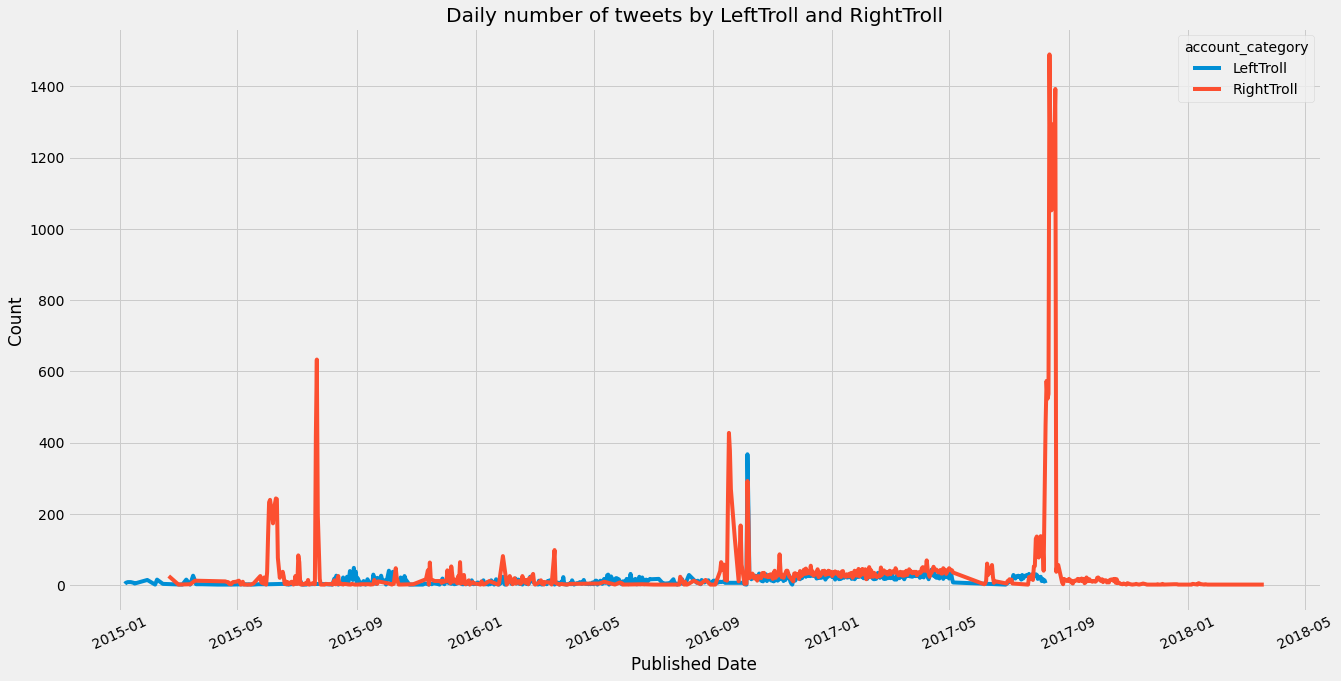

In [41]:
#plot daily number of tweets by LeftTroll and RightTroll
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.lineplot(x = "publish_date", y = "content",hue='account_category', data = two_top_categories_grouped)
plt.title("Daily number of tweets by LeftTroll and RightTroll")
plt.xlabel("Published Date")
plt.ylabel("Count")
plt.xticks(rotation = 25)
plt.show()

### b. The 3rd and 4th categories and rank them by volume of tweets

In [42]:
#third and fourth categories 
third_and_fourth_categories = df[np.logical_or(df['account_category']== 'HashtagGamer' ,df['account_category']== 'NewsFeed')]

In [43]:
third_and_fourth_categories['account_category'].value_counts()

HashtagGamer    6929
NewsFeed        2711
Name: account_category, dtype: int64

In [44]:
# remove time and hour from datetime and using only date
third_and_fourth_categories['publish_date'] = pd.to_datetime(third_and_fourth_categories['publish_date']).dt.date
third_and_fourth_categories = third_and_fourth_categories.sort_values(by="publish_date")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
third_and_fourth_categories['publish_date']

42203    2014-11-27
36956    2014-11-28
24853    2014-11-28
22424    2014-11-28
26643    2014-11-28
            ...    
14863    2017-08-03
29862    2017-08-04
45757    2017-08-06
21604    2017-08-07
30551    2017-08-07
Name: publish_date, Length: 9640, dtype: object

In [46]:
#groubby the tweets by publish date and account_category and counting volume of tweets
third_and_fourth_categories_grouped = third_and_fourth_categories.groupby(['publish_date','account_category']).agg({'content':'count'}).reset_index()

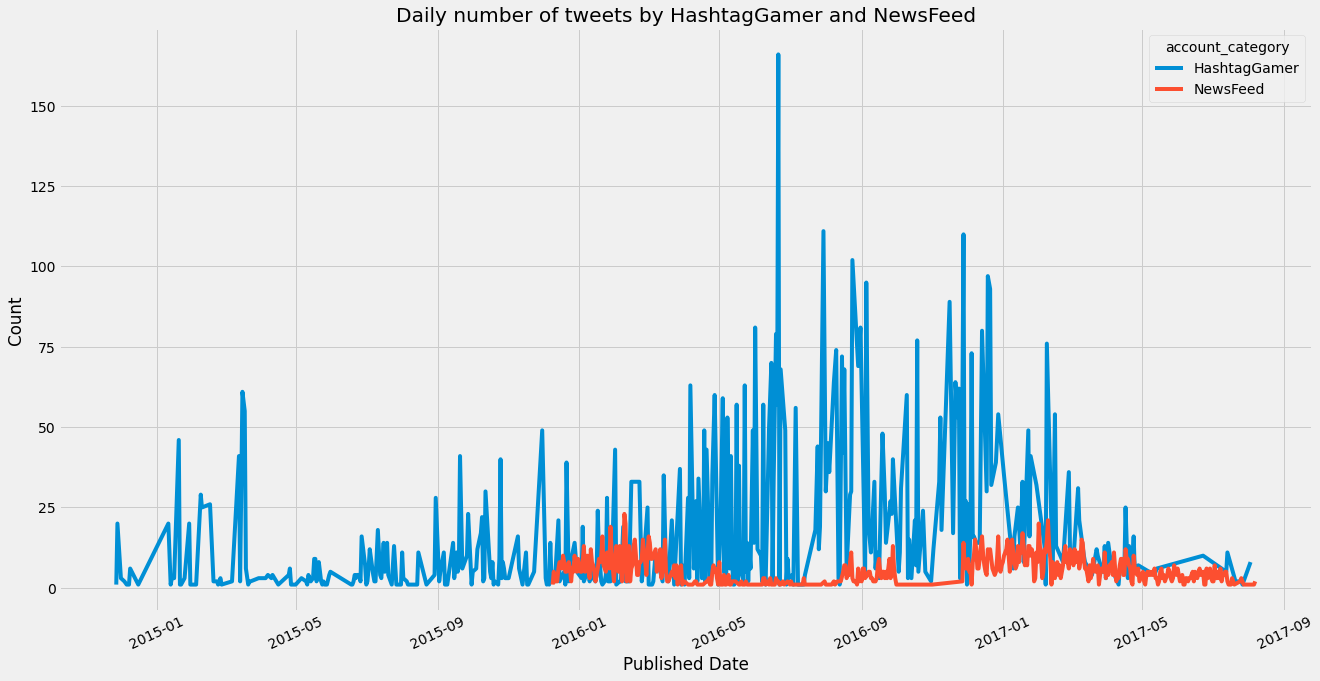

In [47]:
#plot time series plot of number of tweets by HashtagGame and NewsFeed account category
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.lineplot(x = "publish_date", y = "content",hue='account_category', data = third_and_fourth_categories_grouped)
plt.title("Daily number of tweets by HashtagGamer and NewsFeed")
plt.xlabel("Published Date")
plt.ylabel("Count")
plt.xticks(rotation = 25)
plt.show()

# Task 5

## Account Profiling

What are some of the characteristics you would consider when identifying fake or suspicious accounts on twitter?

Using the data provided, identify one account that you suspect might be automated and flag some of the bot-like traits you identified.

### What are some of the characteristics you would consider when identifying fake or suspicious accounts on twitter

Some of the characteristics I consider as fake account on twitter is:-

a. Users posting activity and timeline of the posting - these accounts most of the time use random post just related to some specific issues only and also if its snippet from other source that it may be copied from some other places

b. Users screen handle and account name - Often these accounts use names and identities that not only look real but are designed to get closer access to specific people and their target audience

c. Account creation date - It was created recently – in the recent dates and have many friends and followers

d. Little or no contacts in common. When the profile has nothing in common with you such as friends or even a professional interest, and they are trying to add you, it’s likely for malicious reasons.

e. Accounts with no personal information.


### Using the data provided, identify one account that you suspect might be automated and flag some of the bot-like traits you identified.

In [48]:
# remove time and hour from datetime and using only date
df['publish_date'] = pd.to_datetime(df['publish_date']).dt.date
df = df.sort_values(by="publish_date")

In [51]:
# groupby tweets by publish date and author and count number of tweets daily and flag more than 50 tweets per day as fake account
df_groupby_date_author = df.groupby(['author','publish_date']).agg({"content":'count'}).reset_index()
df_groupby_date_author.head()

,author,publish_date,content
0,10_GOP,2017-09-07,1
1,10_GOP,2017-09-08,3
2,10_GOP,2017-09-09,2
3,10_GOP,2017-09-10,3
4,10_GOP,2017-09-11,2


In [52]:
# label all accounts with more than 50 tweets per day as fake account
fake_accounts = df_groupby_date_author[df_groupby_date_author['content'] > 50 ]
fake_accounts

,author,publish_date,content
951,ADAMCHAPMANJR,2016-10-06,113
952,ADAMCHAPMANJR,2016-10-07,56
985,ADNNELSTR,2017-08-11,74
986,ADNNELSTR,2017-08-12,191
987,ADNNELSTR,2017-08-13,202
...,...,...,...
4537,ARM_2_ALAN,2015-07-23,195
4569,ARTEMSSFE,2017-08-13,52
4571,ARTEMSSFE,2017-08-15,64
4572,ARTEMSSFE,2017-08-16,58


In [53]:
# display number of unique accounts in fake accounts dataframe
fake_accounts.author.unique()

array(['ADAMCHAPMANJR', 'ADNNELSTR', 'ADRIASNSS', 'AFEELIUTR',
       'ALANISSTRS', 'ALECMOOOOODY', 'ALEXXDRTRR', 'AMBERLINETR',
       'AMELIEBALDWIN', 'AMYYSLEGENTR', 'ANAAISLEC', 'ANAALESSIS',
       'ANDIOSMARRTRUMP', 'ANDYHASHTAGGER', 'ANGISDOOYL', 'ANIIANTRS',
       'ANNIEPOSHES', 'ANTONRUMSS', 'ARABMTR', 'ARM_2_ALAN', 'ARTEMSSFE',
       'AURRLISTR'], dtype=object)

### Analyza fake account from accounts followers, following and tweets


In [56]:
## label all account with low followers and high retweet as fake accounts
df_fake = df[np.logical_and(df['retweet']>df['followers'],df['following']<1)]
df_fake

,Unnamed: 0,author,content,region,language,publish_date,following,followers,post_type,account_type,retweet,account_category,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
37401,37458,ABOUTPOLIT,Take a look at the best photos from the week i...,United States,English,2016-07-11,0,0,RETWEET,Left,1,LeftTroll,752510042373365760,http://twitter.com/aboutpolit/statuses/7525100...,https://twitter.com/CNNPolitics/status/7522309...,http://cnn.it/29N4gkJ,NaN
10220,10238,ABOUTPOLIT,"Goya’s visionary painting, “Brexit Devouring B...",United States,English,2016-07-11,0,0,RETWEET,Left,1,LeftTroll,752510259999027201,http://twitter.com/aboutpolit/statuses/7525102...,https://twitter.com/Robert___Harris/status/752...,NaN,NaN
7662,7676,AMBERLINETR,#ste REMINDER : Federal Prosecutor Investigati...,United States,English,2017-07-27,0,0,RETWEET,Right,1,RightTroll,890431681315749888,http://twitter.com/890429331373043712/statuses...,https://twitter.com/sterllarTR/status/89038211...,http://ift.tt/2u0iNOO,NaN
44996,45068,AMBERLINETR,#ste Kim Kardashian’s Angry Response to Transg...,United States,English,2017-07-27,0,0,RETWEET,Right,1,RightTroll,890431669710209024,http://twitter.com/890429331373043712/statuses...,https://twitter.com/sterllarTR/status/89038209...,http://ift.tt/2tLqahW,NaN
9719,9737,AMBERLINETR,#ste VIDEO : Sarah Huckabee Puts Pathetic Libe...,United States,English,2017-07-27,0,0,RETWEET,Right,1,RightTroll,890431644020035585,http://twitter.com/890429331373043712/statuses...,https://twitter.com/sterllarTR/status/89038054...,http://ift.tt/2u0tgtx,NaN
226,227,AFEELIUTR,#ste LOL VIDEO : “The View” Tries to do a Trum...,United States,English,2017-07-29,0,0,RETWEET,Right,1,RightTroll,891185073839644672,http://twitter.com/891183122305486848/statuses...,https://twitter.com/sterllarTR/status/89111994...,http://ift.tt/2uL9i86,NaN
20252,20284,ARABMTR,#ste “Gender Reassignment Surgery” Has Just Re...,Unknown,English,2017-07-29,0,0,RETWEET,Right,1,RightTroll,891232581936709633,http://twitter.com/891230914629521408/statuses...,https://twitter.com/sterllarTR/status/89111699...,http://ift.tt/2tLFhnk,NaN
3891,3899,ALIISTRR,#ste Turns Out Obama’s Unmasking Scheme is Wor...,United States,English,2017-07-29,0,0,RETWEET,Right,1,RightTroll,891204184418250752,http://twitter.com/891202510660259840/statuses...,https://twitter.com/sterllarTR/status/89109330...,http://ift.tt/2eUXdJJ,NaN
34526,34580,ARABMTR,#ste WOW!! Look What Scaramucci Decided for on...,Unknown,English,2017-07-29,0,0,RETWEET,Right,1,RightTroll,891232613561761793,http://twitter.com/891230914629521408/statuses...,https://twitter.com/sterllarTR/status/89111995...,http://ift.tt/2v5rPhS,NaN
37350,37407,ARABMTR,#ste LOL VIDEO : “The View” Tries to do a Trum...,Unknown,English,2017-07-29,0,0,RETWEET,Right,1,RightTroll,891232604179111936,http://twitter.com/891230914629521408/statuses...,https://twitter.com/sterllarTR/status/89111994...,http://ift.tt/2uL9i86,NaN


In [57]:
#unique authors from df_fake
df_fake.author.unique()

array(['ABOUTPOLIT', 'AMBERLINETR', 'AFEELIUTR', 'ARABMTR', 'ALIISTRR',
       'ARAGARTRR', 'ADRIASNSS', 'ADNNELSTR', 'AMBERRPAR', 'ANAAISLEC',
       'ASHLEEYWES', 'ASWWIMMORRIS', 'AURRLISTR'], dtype=object)

AS you can see from above analyses most tweets have the same amount of retweets and with no followers and no followings. this makes it more suspicious and fake accounts